<a href="https://colab.research.google.com/github/Ehtisham1053/Classification-ML-algorithms/blob/main/Hyperparameter_in_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Underfitting Model
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        43
           1       0.94      0.89      0.91        71

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114

Accuracy: 0.8947368421052632


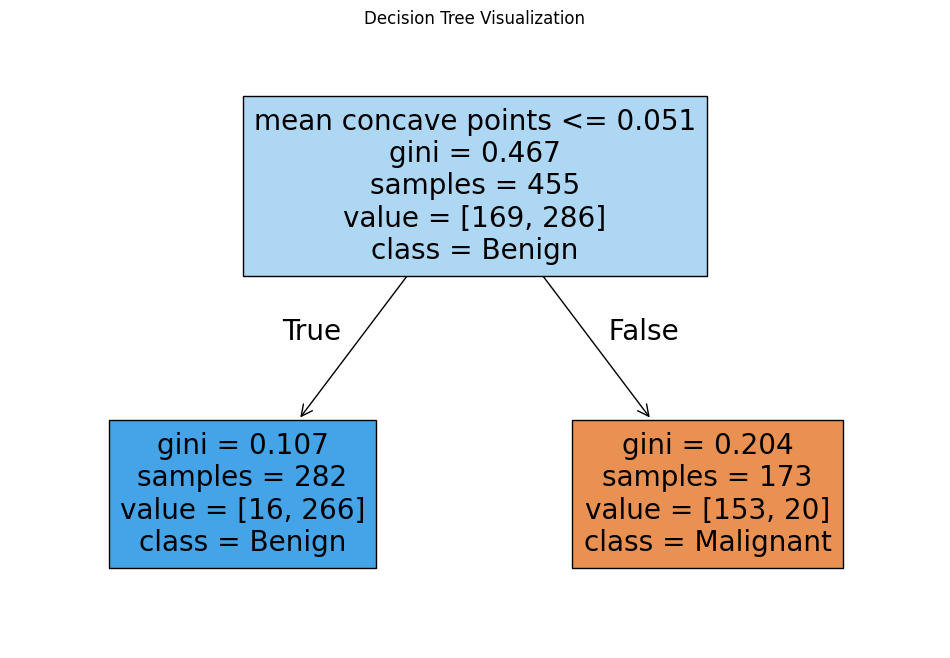

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class DecisionTreeModel:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.model = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))

    def plot_tree(self, feature_names):
        plt.figure(figsize=(12, 8))
        plot_tree(self.model, feature_names=feature_names, class_names=['Malignant', 'Benign'], filled=True)
        plt.title('Decision Tree Visualization')
        plt.show()

# Underfitting (Too Simple Model)
underfitting_model = DecisionTreeModel(max_depth=1)
underfitting_model.train(X_train, y_train)
print("Underfitting Model")
underfitting_model.evaluate(X_test, y_test)
underfitting_model.plot_tree(X.columns)



Overfitting Model
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy: 0.9473684210526315


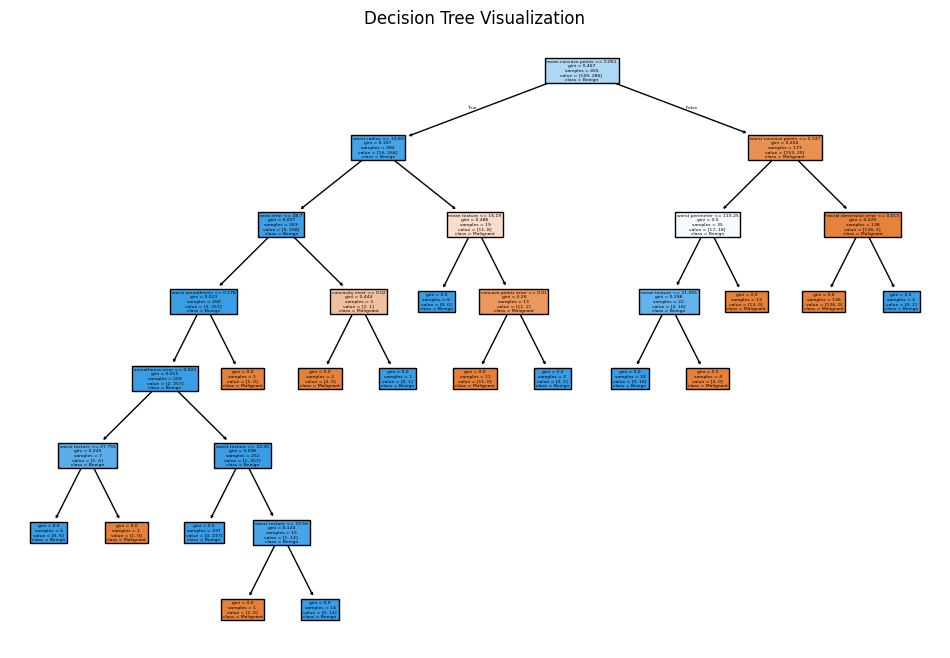

In [2]:
# Overfitting (Too Complex Model)
overfitting_model = DecisionTreeModel(max_depth=None, min_samples_split=2, min_samples_leaf=1)
overfitting_model.train(X_train, y_train)
print("Overfitting Model")
overfitting_model.evaluate(X_test, y_test)
overfitting_model.plot_tree(X.columns)

Optimal Model
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193


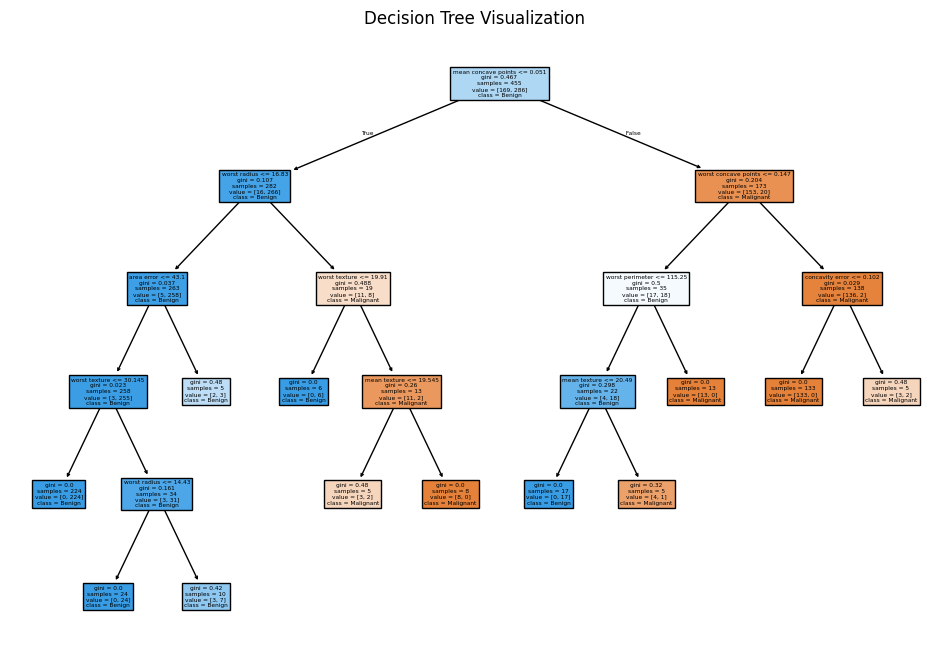

In [3]:
# Optimal Model (Balanced)
optimal_model = DecisionTreeModel(max_depth=5, min_samples_split=10, min_samples_leaf=5)
optimal_model.train(X_train, y_train)
print("Optimal Model")
optimal_model.evaluate(X_test, y_test)
optimal_model.plot_tree(X.columns)

In [4]:

# Cross-validation to compare models
models = {'Underfitting': underfitting_model, 'Overfitting': overfitting_model, 'Optimal': optimal_model}
for name, model in models.items():
    scores = cross_val_score(model.model, X, y, cv=5)
    print(f"{name} Model - Cross Validation Accuracy: {np.mean(scores):.4f}")

Underfitting Model - Cross Validation Accuracy: 0.8998
Overfitting Model - Cross Validation Accuracy: 0.9173
Optimal Model - Cross Validation Accuracy: 0.9315
